# Olympics Dataset - Case Study

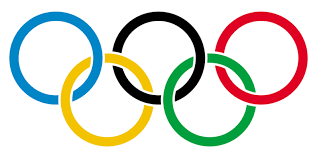

# Introduction

The Olympic Games, considered to be the world's foremost sports competition has more than 200 nations participating across the Summer and Winter Games alternating by occurring every four years but two years apart.<br>

In this project, we are going to see the Olympics Data analysis using Python.The modern Olympic Games or Olympics are leading international sports events featuring summer and winter sports competitions in which thousands of athletes from around the world participate in a variety of competitions. The Olympic Games are considered the world’s foremost sports competition with more than 200 nations participating. Around 110 countiers have won the medals in different category of sports. Totally there are 49 sports. The Dataset contains the olympics winners from year 2000 to 2012.<br></br>
For every event there are three winners ( like Gold Medal, Silver Medal and Bronze Medal ). Therefore various data is generated. So, by using Python I will analyze this data.<br></br>

## Problem Statement:

Throughout this project, I will explore the Olympics dataset, clean the data and look at some interesting statistics and then try to find out which country has won more number of Medals in Olympic Games.

## Data Set Characteristics:

Number of Observations in Data set : 8618
<br></br>
Number of features : 10


## Feature Description

|Feature|Data Type|Description|
|--------|---------|-----------|
|Name | Object | Name of the player|
|Age | Integer | Age of the player|
|Country | Object | Name of the country(player belongs to)|
|Year | Integer |  The year of the Olympics that the athlete competed in|
|Date Given | Object | The date which player won the Medal |
|Sports | Object |  The sport that the athlete competed in|
|Gold medal | Integer | No of gold medals won |
|Silver medal | Integer | No of Silver medals won |
|Bronze medal | Integer | No of Bronze medals won |
|Total medals | Integer | No of Total medals won |

## Import Dependecies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

## Display all the columns in a dataframe
pd.pandas.set_option('display.max_columns',None)

# import warning library
import warnings
warnings.filterwarnings("ignore")

## Loading the Dataset

In [2]:
olympix_df = pd.read_csv(r'olympix_data_organized_with_header (1).csv')
olympix_df.head(5)  # printing first 5 rows

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
0,Michael Phelps,23.0,United States,2008,8/24/2008,Swimming,8,0,0,8
1,Michael Phelps,19.0,United States,2004,8/29/2004,Swimming,6,0,2,8
2,Michael Phelps,27.0,United States,2012,8/12/2012,Swimming,4,2,0,6
3,Natalie Coughlin,25.0,United States,2008,8/24/2008,Swimming,1,2,3,6
4,Aleksey Nemov,24.0,Russia,2000,10/1/2000,Gymnastics,2,1,3,6


In [3]:
olympix_df.tail(5)  # printing last 5 rows

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
8613,Olena Sadovnycha,32.0,Ukraine,2000,10/1/2000,Archery,0,1,0,1
8614,Kateryna Serdiuk,17.0,Ukraine,2000,10/1/2000,Archery,0,1,0,1
8615,Wietse van Alten,21.0,Netherlands,2000,10/1/2000,Archery,0,0,1,1
8616,Sandra Wagner-Sachse,31.0,Germany,2000,10/1/2000,Archery,0,0,1,1
8617,Rod White,23.0,United States,2000,10/1/2000,Archery,0,0,1,1


In [4]:
# finding shape of data set
olympix_df.shape 

(8618, 10)

In this Data Frame, there are 8618 Observations and 10 Features.

## Exploration of the data

In [5]:
# information about all the features
olympix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          8613 non-null   object 
 1   age           8613 non-null   float64
 2   country       8618 non-null   object 
 3   year          8618 non-null   int64  
 4   Date_Given    8618 non-null   object 
 5   sports        8618 non-null   object 
 6   gold_medal    8618 non-null   int64  
 7   silver_medal  8618 non-null   int64  
 8   brone_medal   8618 non-null   int64  
 9   total_medal   8618 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 673.4+ KB


### Statistical summary of the dataframe

In [6]:
# Statistical summary of features
olympix_df.describe()

,age,year,gold_medal,silver_medal,brone_medal,total_medal
count,8613.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000
mean,26.405434,2005.978881,0.364702,0.363309,0.377698,1.105709
std,5.102118,4.289946,0.545349,0.511613,0.505005,0.408892
min,15.000000,2000.000000,0.000000,0.000000,0.000000,1.000000
25%,23.000000,2002.000000,0.000000,0.000000,0.000000,1.000000
50%,26.000000,2006.000000,0.000000,0.000000,0.000000,1.000000
75%,29.000000,2010.000000,1.000000,1.000000,1.000000,1.000000
max,61.000000,2012.000000,8.000000,3.000000,3.000000,8.000000


In [7]:
# checking the data type of Date Given feature
olympix_df['Date_Given'].dtype

dtype('O')

**Converting the data type of the "Date Given" feature from object to Date Time format because it is a date not a string**

In [8]:
olympix_df['Date_Given'] = olympix_df['Date_Given'].astype('datetime64[ns]')

In [9]:
# checking the data type after converting
olympix_df['Date_Given'].dtype  

dtype('<M8[ns]')

**The 'Date Given' feature is converted into Date Time format**

## Checking Missing values

In [10]:
# checking total missing values in each feature in dataframe
olympix_df.isna().sum()

name            5
age             5
country         0
year            0
Date_Given      0
sports          0
gold_medal      0
silver_medal    0
brone_medal     0
total_medal     0
dtype: int64

<AxesSubplot:>

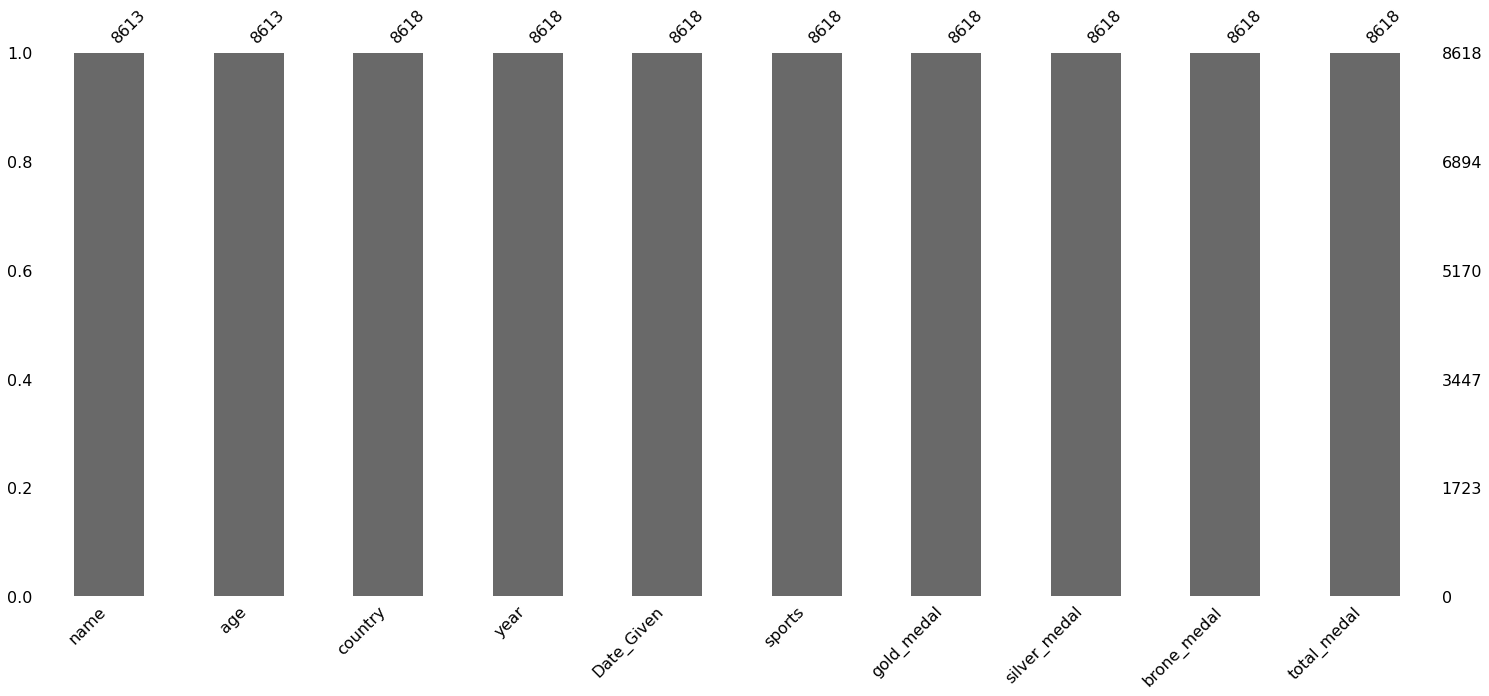

In [11]:
msno.bar(olympix_df)  # bar graph for missing values

**Observation :**
* There are 5 missing values in 'Name' feature
* There are 5 missing values in 'Age' feature

In [12]:
print("Percentage of missing values in Name feature :",np.round(olympix_df['name'].isna().mean() * 100,2),"%")
print("Percentage of missing values in Age feature :",np.round(olympix_df['age'].isna().mean() * 100,2),"%")

Percentage of missing values in Name feature : 0.06 %
Percentage of missing values in Age feature : 0.06 %


There are only 0.06% of missing values in both Name and Age feature. So I am going to remove that missing values

### Dealing with Missing values

Droping the obervations which have the missing values

In [13]:
olympix_df = olympix_df.dropna()

In [14]:
# checking after droping the missing values
olympix_df.isna().sum()

name            0
age             0
country         0
year            0
Date_Given      0
sports          0
gold_medal      0
silver_medal    0
brone_medal     0
total_medal     0
dtype: int64

All the missing values are droped. So now there are no missing values

### Checking the Duplicates in Data Frame

In [15]:
olympix_df.duplicated().sum()

0

There are no Duplicates in this Data frame

## Removing the special characters from the name column.

In [16]:
olympix_df['name'].nunique() # checking total unique names

6955

There are total of 6955 unique names

In [17]:
olympix_df1 = olympix_df.copy()   # creating a copy of original data frame

In [18]:
# importing the regex library for removal of special characters
import re
c = 0
# iterating through name feature
for i in olympix_df1['name']:
    olympix_df1['name'][c] = re.sub('[^a-zA-Z]','',str(i))     # Removing all the special characters
    c = c+1

In [19]:
olympix_df1.head()  # first 5 rows after removal of special characters

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
0,MichaelPhelps,23.0,United States,2008,2008-08-24,Swimming,8,0,0,8
1,MichaelPhelps,19.0,United States,2004,2004-08-29,Swimming,6,0,2,8
2,MichaelPhelps,27.0,United States,2012,2012-08-12,Swimming,4,2,0,6
3,NatalieCoughlin,25.0,United States,2008,2008-08-24,Swimming,1,2,3,6
4,AlekseyNemov,24.0,Russia,2000,2000-10-01,Gymnastics,2,1,3,6


In [20]:
olympix_df1.shape

(8613, 10)

### Converting the cleaned Data Frame to CSV file

In [22]:
olympix_df1.to_csv("olympix_Cleaned_data.csv",index = False)

## Exploration of features through visualization

In [33]:
olympix_df1.columns  # columns in the data frame

Index(['name', 'age', 'country', 'year', 'Date_Given', 'sports', 'gold_medal',
       'silver_medal', 'brone_medal', 'total_medal'],
      dtype='object')

### Finding out the most total medals won in which sport category

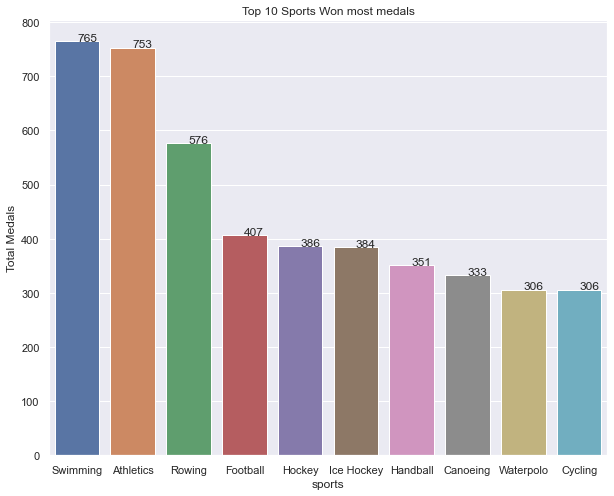

In [34]:
# setting the figure size
sns.set(rc={'figure.figsize':(10,8)})

# Grouping by the sport and picking top 10 sports
sport_medals = olympix_df1.groupby('sports').agg({'total_medal':sum}).sort_values(['total_medal'],ascending=False).head(10)
sport_medals = sport_medals.reset_index()

# barplot
sns.barplot(x = 'sports' ,y='total_medal',data = sport_medals, order = sport_medals.sports)
plt.ylabel("Total Medals")
plt.title("Top 10 Sports Won most medals")

for i,df in enumerate(sport_medals.total_medal):
    plt.text(i,df,str(df))   # ploting the counts of categiers

By the above figure, The most medals are won in Swimming sport(765), second most medals are won in Atheletics sport(753) and followed by Rowing sport(576). These are the top three sports in which most medals are won

### Finding out the most total medals won in which year

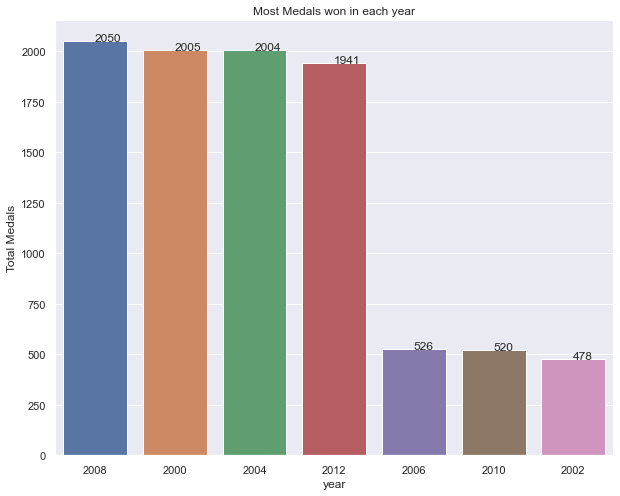

In [35]:
# Grouping by the year
yearly_medals = olympix_df1.groupby('year').agg({'total_medal':sum}).sort_values(['total_medal'],ascending=False)
yearly_medals = yearly_medals.reset_index()

# barplot
sns.barplot(x = 'year' ,y='total_medal',data = yearly_medals, order = yearly_medals.year)
plt.ylabel("Total Medals")
plt.title("Most Medals won in each year")

for i,df in enumerate(yearly_medals.total_medal):
    plt.text(i,df,str(df))   # ploting the counts of categiers

By the above figure, The most medals are won in 2008 year (2050), second most medals are won in 2000 year (2005) and followed by 2004 year (2004) and the year 2002 is least medals won (478). These are the top three years in which most medals are won

### Age Feature Distribution

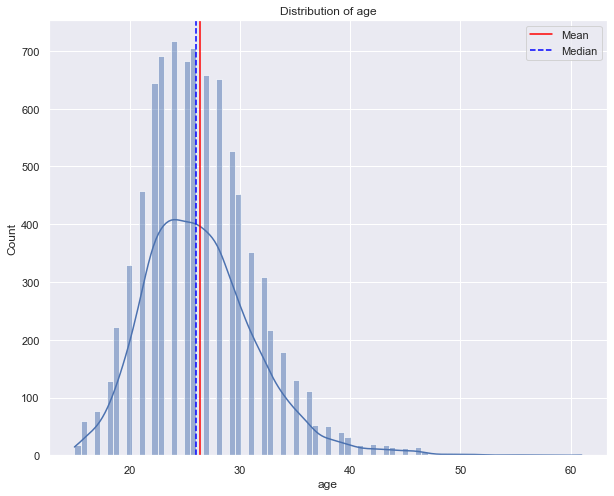

In [36]:
# Checking distribution of age feature using histplot
sns.histplot(olympix_df1['age'],kde = True).set_title('Distribution of age')

plt.axvline(x=olympix_df1['age'].mean(), c='red',label='Mean') # Plotting mean value 
plt.axvline(x=olympix_df1['age'].median(), c='blue',ls='--',label='Median') # Plotting median value
plt.legend()
plt.show()

The Distribution of Age feature is Moderatly Positivily skewed. let check skewness of the feature

In [37]:
olympix_df1['age'].skew()

0.8590070668484233

The skewness value is between 0.5 and 1. So the Age feature is Moderatly skewed. Let's transform this feature for converting into symmetic

### Log transformation

In [38]:
# Adding a new columns and storing log values of age feature
olympix_df1['age_log'] = np.log(olympix_df1['age'])

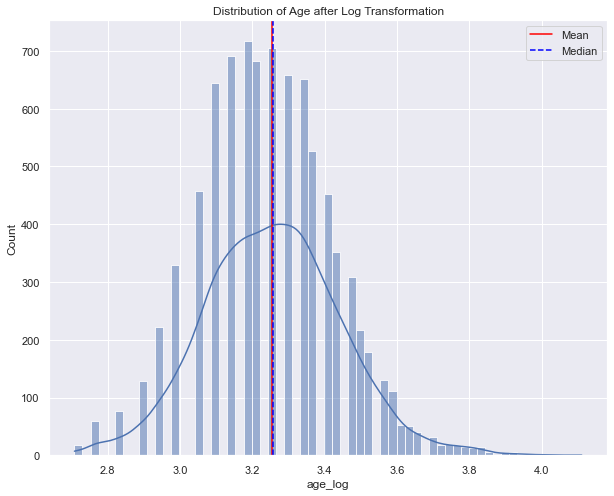

The Skewness of Age feature after Log Transformation : 0.1548420625269884


In [39]:
# Checking distribution of age feature using histplot after log transformation
sns.histplot(olympix_df1['age_log'],kde = True).set_title('Distribution of Age after Log Transformation') # histplot

plt.axvline(x=olympix_df1['age_log'].mean(), c='red',label='Mean') # Plotting mean value 
plt.axvline(x=olympix_df1['age_log'].median(), c='blue',ls='--',label='Median') # Plotting median value
plt.legend()
plt.show()

# Printing the skewness of age feature after Log Transformation
print("The Skewness of Age feature after Log Transformation :",olympix_df1['age_log'].skew())

By the above figure, The Age feature is Normally Distributed after the log transform. The skewness value of Age feature after log transform is between the -0.5 and 0.5 and Mean and Median of age feature is also same. **So now the Distribution of Age feature is Symmetric .**

## Numerical Measures of each feature based on their data types

In [40]:
# Fetching all numerical features
numerical_features = [feature for feature in olympix_df1.columns if olympix_df1[feature].dtype == 'float64' or olympix_df1[feature].dtype == 'int64']
numerical_features

['age',
 'year',
 'gold_medal',
 'silver_medal',
 'brone_medal',
 'total_medal',
 'age_log']

**Statistical summary of Numerical features**

In [41]:
olympix_df1.describe()

,age,year,gold_medal,silver_medal,brone_medal,total_medal,age_log
count,8613.000000,8613.000000,8613.000000,8613.000000,8613.000000,8613.000000,8613.000000
mean,26.405434,2005.975386,0.364914,0.362940,0.377917,1.105770,3.255700
std,5.102118,4.288737,0.545436,0.511531,0.505069,0.409003,0.188060
min,15.000000,2000.000000,0.000000,0.000000,0.000000,1.000000,2.708050
25%,23.000000,2002.000000,0.000000,0.000000,0.000000,1.000000,3.135494
50%,26.000000,2006.000000,0.000000,0.000000,0.000000,1.000000,3.258097
75%,29.000000,2010.000000,1.000000,1.000000,1.000000,1.000000,3.367296
max,61.000000,2012.000000,8.000000,3.000000,3.000000,8.000000,4.110874


The above data frame contains all the Numerical Measures of  Numerical features.

In [42]:
# Finding Variance of each numerical feature
for feature in numerical_features:
    print("Variance of",feature," : ",np.var(olympix_df1[feature]))

Variance of age  :  26.028587682030835
Variance of year  :  18.391127579403125
Variance of gold_medal  :  0.29746625572501323
Variance of silver_medal  :  0.26163361961290277
Variance of brone_medal  :  0.25506557910263605
Variance of total_medal  :  0.16726381211498498
Variance of age_log  :  0.035362552976781085


**Statistical summary of Categorical features**

In [43]:
olympix_df1.describe(exclude = ['float64','int64','datetime64[ns]'])

,name,country,sports
count,8613,8613,8613
unique,6955,110,49
top,RobertScheidt,United States,Athletics
freq,4,1109,687


The above data frame contains all the Numerical Measures of Categorical features.

 ## Top 10 Countries with the Gold medal

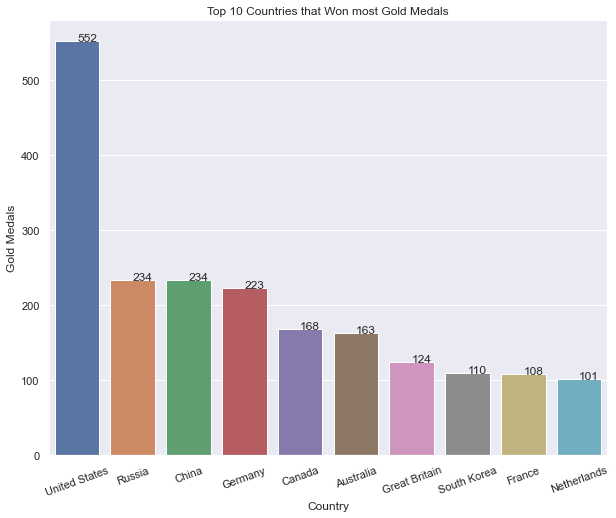

In [44]:
# Grouping by the country and sorting top 10 countries
top_gold = olympix_df1.groupby('country').agg({'gold_medal':sum}).sort_values(['gold_medal'],ascending=False).head(10)
top_gold = top_gold.reset_index()

# barplot
sns.barplot(x = 'country' ,y='gold_medal',data = top_gold, order = top_gold.country)
plt.xticks(rotation = 20)
plt.xlabel("Country")
plt.ylabel("Gold Medals")
plt.title("Top 10 Countries that Won most Gold Medals")

for i,df in enumerate(top_gold.gold_medal):
    plt.text(i,df,str(df))   # ploting the counts of categiers

**Observation :**
* Unites States is the country that has won most Gold Medals(552).
* Russia and China are countries that have won the second most Gold Medals(234).
* Germany has won third most Gold medals (223).
* Then followed by Canada (168), Australia(163), Great Britain(124), South Korea(110), France(108) and Netherlands(101). These are Top 10 countries have won most Gold medals.


## Top 10 Countries with the Silver medal

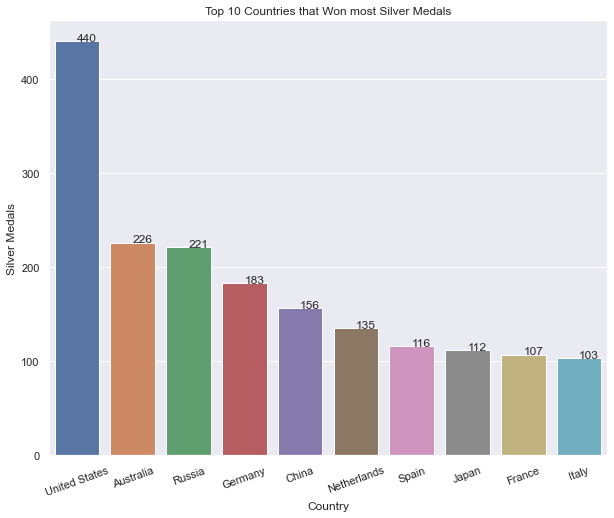

In [45]:
# Grouping by the country and sorting top 10 countries
top_silver = olympix_df1.groupby('country').agg({'silver_medal':sum}).sort_values(['silver_medal'],ascending=False).head(10)
top_silver = top_silver.reset_index()

# barplot
sns.barplot(x = 'country' ,y='silver_medal',data = top_silver, order = top_silver.country)
plt.xticks(rotation = 20)
plt.xlabel("Country")
plt.ylabel("Silver Medals")
plt.title("Top 10 Countries that Won most Silver Medals")

for i,df in enumerate(top_silver.silver_medal):
    plt.text(i,df,str(df))   # ploting the counts of categiers

**Observation :**
* Unites States is the country that has won most Silver Medals(440).
* Australia is the country that has won Second most Silver Medals(226).
* Russia is the country that has won Third most Silver Medals(221).
* Then followed by Germany(183), China(156), Netherlands(135), Spain(116), Japan(112), France(107) and Italy(103). These are Top 10 countries have won most Sliver medals.


## Top 10 Countries with the Bronze medal

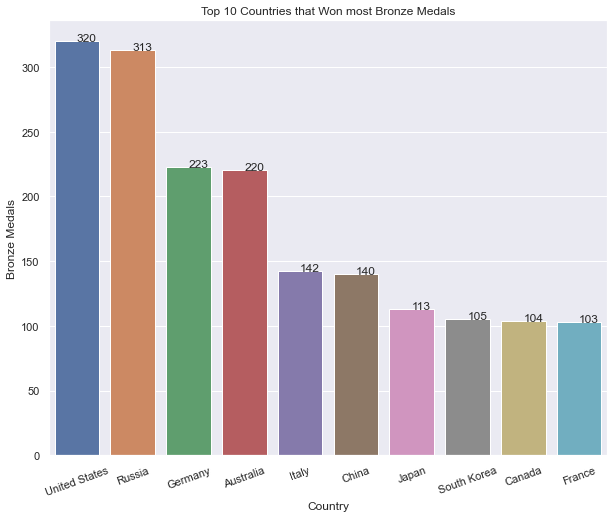

In [46]:
# Grouping by the country and sorting top 10 countries
top_bronze = olympix_df1.groupby('country').agg({'brone_medal':sum}).sort_values(['brone_medal'],ascending=False).head(10)
top_bronze = top_bronze.reset_index()

# barplot
sns.barplot(x = 'country' ,y='brone_medal',data = top_bronze, order = top_bronze.country)
plt.xticks(rotation = 20)
plt.xlabel("Country")
plt.ylabel("Bronze Medals")
plt.title("Top 10 Countries that Won most Bronze Medals")

for i,df in enumerate(top_bronze.brone_medal):
    plt.text(i,df,str(df))   # ploting the counts of categiers

**Observation :**
* Unites States is the country that has won most Bronze Medals(320).
* Russia is the country that has won Second most Bronze Medals(313).
* Germany is the country that has won Third most Bronze Medals(223).
* Then followed by Australia(220), Italy(142), China(140), Japan(113), South Korea(105), Canada(104) and France(103). These are Top 10 countries have won most Bronze medals.

## Top 10 Countries with the Total Medals

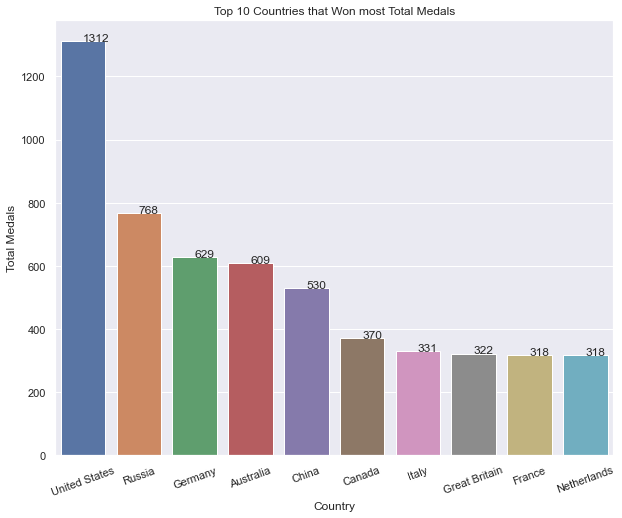

In [47]:
# Grouping by the country and sorting top 10 countries
top_total_medal = olympix_df1.groupby('country').agg({'total_medal':sum}).sort_values(['total_medal'],ascending=False).head(10)
top_total_medal = top_total_medal.reset_index()

# barplot
sns.barplot(x = 'country' ,y='total_medal',data = top_total_medal, order = top_total_medal.country)
plt.xticks(rotation = 20)
plt.xlabel("Country")
plt.ylabel("Total Medals")
plt.title("Top 10 Countries that Won most Total Medals")

for i,df in enumerate(top_total_medal.total_medal):
    plt.text(i,df,str(df))   # ploting the counts of categiers

**Observation :**
* Unites States is the country that has won most Total Medals(1312).
* Russia is the country that has won Second most Total Medals(768).
* Germany is the country that has won Third most Total Medals(629).
* Then followed by Australia(609), China(530), Canada(370), Italy(331), Great Britain(322), France(318) and Netherlands(318). These are Top 10 countries have won most Total medals.